<a href="https://colab.research.google.com/github/charusanmathi/Machine-Learning/blob/main/Netflix_movie_recommendation_system_charu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# LOADING DATA
df = pd.read_csv('combined_data_1.txt')

In [4]:
df.head()

,,1:
1488844,3.0,2005-09-06
822109,5.0,2005-05-13
885013,4.0,2005-10-19
30878,4.0,2005-12-26
823519,3.0,2004-05-03


In [5]:
# There are no headings or column names, so let us add the column names

df = pd.read_csv('combined_data_1.txt', names = ['Cust_Id', 'Rating'], usecols = [0,1])

# usecols allows us to drop the columns that are not of any interest
# for example the date columnn in the data is no use in the recommendation systems
#  Renaming the columns as Customer Id and rating

In [6]:
# Checking for successful change in column names

df.head()

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [7]:
# SHAPE OF DATA

df.shape

# This dataset has 24058263 rows (user info) and 2 columns

(24058263, 2)

In [8]:
# DATA SUMMARY
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24058263 entries, 0 to 24058262
Data columns (total 2 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Cust_Id  object 
 1   Rating   float64
dtypes: float64(1), object(1)
memory usage: 367.1+ MB



# CHECKING FOR DATA DISTRIBUTION:

In [9]:
Rating = df.groupby('Rating')['Rating'].agg(['count'])

In [10]:
Rating

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


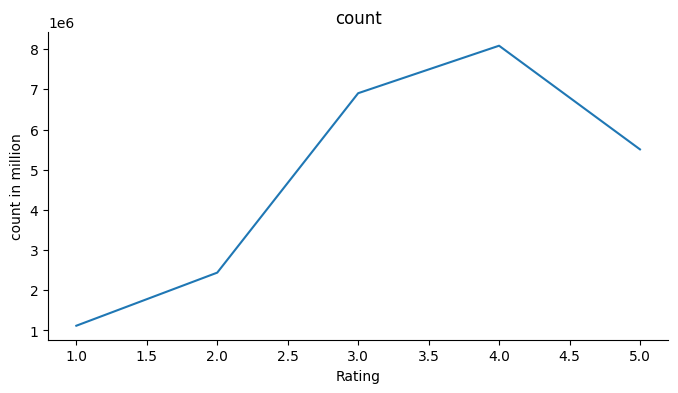

In [11]:
from matplotlib import pyplot as plt
Rating['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.ylabel("count in million")
plt.gca().spines[['top', 'right']].set_visible(False)

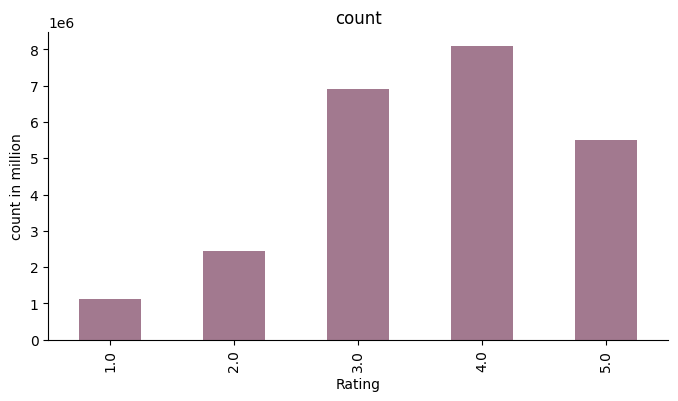

In [12]:
Rating['count'].plot(kind='bar', figsize=(8, 4), title='count', color ='#a2798f')
plt.ylabel("count in million")
plt.gca().spines[['top', 'right']].set_visible(False)

Insights


1. Majority of the ratings are between 3 and 4
2. Rating 1 and 2 have the least users
3. 1 million users have rated movies as 5


In [13]:
#There are a lot of movies and each user is grouped for the rating under each movie. The rating column shows NaN agains the movie Id.
#To deduce how many movies are there, number of NaN values have to be counted


#get movie count by counting nan values

movie_count = df.isnull().sum()[1]

movie_count

#Total number of movie count is 4499



4499

In [14]:
# get customer count
cust_count = df['Cust_Id'].nunique() - movie_count

# get rating count
rating_count = df['Cust_Id'].count() - movie_count


In [15]:
cust_count, rating_count

#There are 470758 customers and 24053764 ratings

(470758, 24053764)

# Distribution of data


In [16]:
Rating['percent'] = Rating['count']/Rating['count'].sum() *100

In [17]:
Rating

,count,percent
Rating,,
1.0,1118186,4.648694
2.0,2439073,10.140089
3.0,6904181,28.703121
4.0,8085741,33.615284
5.0,5506583,22.892812


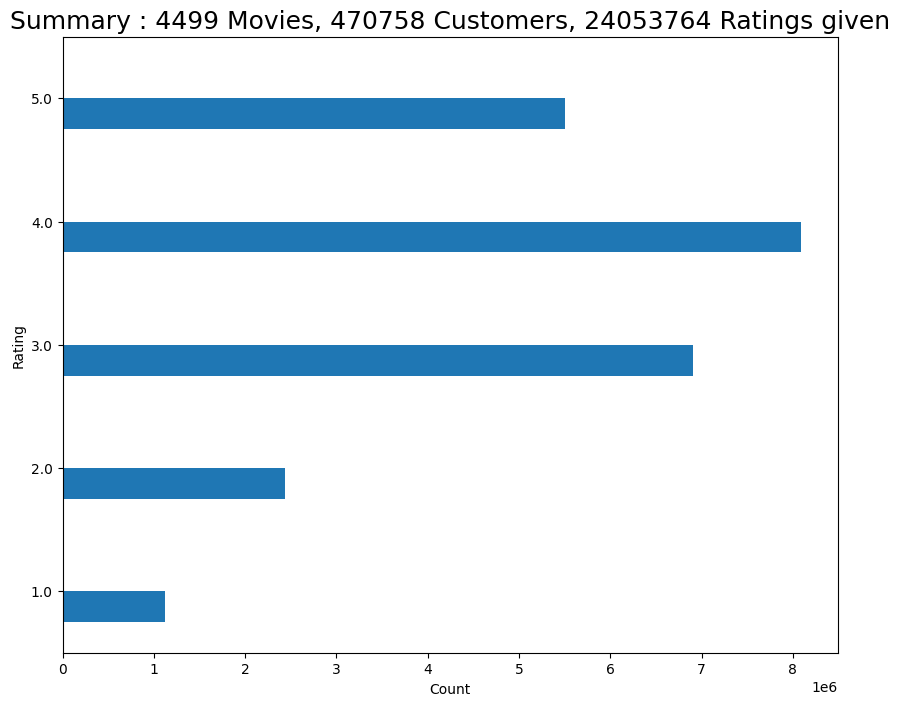

In [18]:
ax = Rating.plot(kind = 'barh', legend = False, figsize = (10,8))
plt.title(f'Summary : {movie_count} Movies, {cust_count} Customers, {rating_count} Ratings given' , fontsize = 18)
plt.xlabel('Count')
plt.show()

for i in range(1,6):
    ax.text(Rating.iloc[i-1][0]/4, i-1, 'Rating {}: {:.0f}%'.format(i, Rating.iloc[i-1][0]*100 / Rating.sum()[0]),
            color = 'red', weight = 'bold' )

In [19]:
#Customer Id column has both movie Id and customer Id, so we need to separate a new column with Movie id by creating a Nan Data frame to the
#same length of the RATINGS


CREATING A NUMPY ARRAY TO THE SAME LENGTH OF RATING COLUMN

In [20]:
df_nan = pd.DataFrame(pd.isnull(df.Rating))

#Selecting only those rows containing True for nan values
df_nan = df_nan[df_nan['Rating'] == True]

#Resetting dataframe index
df_nan = df_nan.reset_index()


In [21]:
df_nan.head()

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True


In [22]:
#Creating a new movie_id list to impute as new column

#Iterating over every movie Id, to know how many to fill

movie_np = []
movie_id = 1

for i,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):
    # Using numpy to create a full matrix containing the movie ids extracted
    id = np.full((1,i-j-1), movie_id)
    movie_np = np.append(movie_np, id)
    movie_id += 1

# Account for last record and corresponding length
# numpy approach
last_record = np.full((1,len(df) - df_nan.iloc[-1, 0] - 1),movie_id)
movie_np = np.append(movie_np, last_record)

print('Movie numpy: {}'.format(movie_np))
print('Length: {}'.format(len(movie_np)))

Movie numpy: [1.000e+00 1.000e+00 1.000e+00 ... 4.499e+03 4.499e+03 4.499e+03]
Length: 24053764


In [23]:
movie_np# Drop the movie id rows from the original dataframe as we have created a new column
df = df[pd.notnull(df['Rating'])] #not null function will retain only those rows that do not have Nan


#Converting the Movie_id and cust_id columns in int

df['Movie_Id'] = movie_np.astype(int)
df['Cust_Id'] = df['Cust_Id'].astype(int)


print('-Dataset examples-')
print(df.iloc[::5000000, :])

<ipython-input-23-bf3326114a35>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Movie_Id'] = movie_np.astype(int)


-Dataset examples-
          Cust_Id  Rating  Movie_Id
1         1488844     3.0         1
5000996    501954     2.0       996
10001962   404654     5.0      1962
15002876   886608     2.0      2876
20003825  1193835     2.0      3825


In [24]:
#Creating a list of aggregate functions 'count' and 'mean'
f = ['count','mean']

#To create a list of all the movies rated less often(only include top 30% rated movies)

#Creating a new dataframe by grouping by movie id and rating
df_movie_summary = df.groupby('Movie_Id')['Rating'].agg(f)

#Converting the index into int
df_movie_summary.index = df_movie_summary.index.map(int)

#Creating a benchmark to filter out top 30%
movie_benchmark = round(df_movie_summary['count'].quantile(0.7),0)

#Removing all the other movies which did not make it top 30
drop_movie_list = df_movie_summary[df_movie_summary['count'] < movie_benchmark].index

print('Movie minimum times of review: {}'.format(movie_benchmark))


#To create a list of all the inactive users(users who rate less often)
df_cust_summary = df.groupby('Cust_Id')['Rating'].agg(f)

#Converting the index into int
df_cust_summary.index = df_cust_summary.index.map(int)

#Creating a benchmark to filter out top 30% of the users who have rated consistently
cust_benchmark = round(df_cust_summary['count'].quantile(0.7),0)


#Removing all the other movies which did not make it top 30
drop_cust_list = df_cust_summary[df_cust_summary['count'] < cust_benchmark].index

print('Customer minimum times of review: {}'.format(cust_benchmark))

#INSIGHTS

#1. Movie minimum times of review: 1799.0
#2. Customer minimum times of review: 52.0


Movie minimum times of review: 1799.0
Customer minimum times of review: 52.0


In [25]:
print('Original Shape: {}'.format(df.shape))

Original Shape: (24053764, 3)


In [26]:
#TRIMMING DATAFRAME TO REMOVE MOVIES FROM THE DROP MOVIE LIST AND DROP CUST LIST

In [27]:
df = df[~df['Movie_Id'].isin(drop_movie_list)]

#if present drop /remove them
df = df[~df['Cust_Id'].isin(drop_cust_list)]
#removing all inactive users from our dataset
print('After Trim Shape: {}'.format(df.shape))

After Trim Shape: (17337458, 3)


In [28]:
Numrowslost = 24053764 - 17337458
Numrowslost

6716306

In [29]:
#INSIGHTS

#6716306 rows have been dropped which did not make to top 30 movie rating list and customers who rate less

In [30]:
df.head()

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


## Pivoting the dataframe so that the movie ids are columns are movie id and rows are user id

In [31]:
df_p = pd.pivot_table(df,values='Rating',index='Cust_Id',columns='Movie_Id')

print(df_p.shape)

(143458, 1350)


In [32]:
df_p.head()

Movie_Id,3,8,16,17,18,26,28,30,32,33,...,4472,4474,4478,4479,4485,4488,4490,4492,4493,4496
Cust_Id,,,,,,,,,,,,,,,,,,,,,
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,5.0,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,...,3.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


DATA MAPPING

In [33]:
#Mapping the movie id to movie titles

In [34]:
df_title = pd.read_csv('/content/movie_titles _1_.csv', encoding = "ISO-8859-1", names = ['Movie_Id', 'Year', 'Name', 'Extra', 'Extra2', 'Extra7'])

df_title.set_index('Movie_Id', inplace = True)

#Adding extra columns to accomodate the text in the movie title id folder and dropping them
df_title = df_title.drop(columns = ['Extra', 'Extra2', 'Extra7'], axis = 1)

print (df_title.head(10))

            Year                          Name
Movie_Id                                      
1         2003.0               Dinosaur Planet
2         2004.0    Isle of Man TT 2004 Review
3         1997.0                     Character
4         1994.0  Paula Abdul's Get Up & Dance
5         2004.0      The Rise and Fall of ECW
6         1997.0                          Sick
7         1992.0                         8 Man
8         2004.0    What the #$*! Do We Know!?
9         1991.0      Class of Nuke 'Em High 2
10        2001.0                       Fighter


In [35]:
# To install the scikit-surprise library for implementing SVD

In [36]:
pip install scikit-surprise

In [37]:
# Import required libraries
import math

import matplotlib.pyplot as plt

from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [38]:
# Load Reader library
reader = Reader()

# get just top 100K rows for faster run time
data = Dataset.load_from_df(df[['Cust_Id', 'Movie_Id', 'Rating']][:100000], reader)

# Use the SVD algorithm.
svd = SVD()

# Compute the RMSE of the SVD algorithm
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0020  0.9947  0.9974  0.9980  0.0030  
MAE (testset)     0.7975  0.7927  0.7976  0.7959  0.0023  
Fit time          1.12    0.84    1.58    1.18    0.31    
Test time         0.13    0.30    0.35    0.26    0.09    


{'test_rmse': array([1.00199549, 0.99466514, 0.99744195]),
 'test_mae': array([0.79750854, 0.7927465 , 0.79757406]),
 'fit_time': (1.122420072555542, 0.842667818069458, 1.584571361541748),
 'test_time': (0.12999725341796875, 0.2952127456665039, 0.353363037109375)}

In [39]:
df.head(20)

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
701,439011,1.0,3
703,1644750,3.0,3
704,2031561,4.0,3
705,616720,4.0,3
706,2467008,4.0,3


In [40]:
#To find all the movies rated as 5 stars by user with userId = 2519847

In [41]:
df_2519847 = df[(df['Cust_Id'] == 2519847) & (df['Rating'] == 5)]
df_2519847 = df_2519847.set_index('Movie_Id')
df_2519847 = df_2519847.join(df_title)['Name']
print(df_2519847)

Movie_Id
3                      Character
97                 Mostly Martha
707                   The Return
720                   Roger & Me
895                  Dersu Uzala
1047            Aimee and Jaguar
1130                   Impromptu
2015                 Talk to Her
2640        The Spanish Prisoner
2813               Bad Education
3267            Muriel's Wedding
3301            Burnt by the Sun
3886                  Live Flesh
4253    Kind Hearts and Coronets
4345       Bowling for Columbine
Name: Name, dtype: object


In [42]:
# Train an SVD to predict ratings for user with userId = 2519847

In [43]:
#Creating a copy of the original dataset

user_2519847 = df_title.copy()
user_2519847 = user_2519847.reset_index()

#To remove all the movies rated less often
user_2519847 = user_2519847[~user_2519847['Movie_Id'].isin(drop_movie_list)]

# getting full dataset
data = Dataset.load_from_df(df[['Cust_Id', 'Movie_Id', 'Rating']], reader)

#create a training set for svd
trainset = data.build_full_trainset()
svd.fit(trainset)

#Predict the ratings for user_2519847
user_2519847['Estimate_Score'] = user_2519847['Movie_Id'].apply(lambda x: svd.predict(2519847, x).est)

#Drop extra columns from the user_712664 data frame
user_2519847 = user_2519847.drop('Movie_Id', axis = 1)


# Sort predicted ratings for user_712664 in descending order
user_2519847 = user_2519847.sort_values('Estimate_Score', ascending=False)

#Print top 10 recommendations
print(user_2519847.head(10))

        Year                                      Name  Estimate_Score
1097  1965.0                     The Battle of Algiers        4.885567
894   1975.0                               Dersu Uzala        4.691524
4053  1990.0  House of Cards Trilogy I: House of Cards        4.669037
871   1954.0                             Seven Samurai        4.636188
2598  1959.0                             Black Orpheus        4.571206
4039  1993.0                         Tales of the City        4.556060
1707  1936.0                              Modern Times        4.504305
962   1951.0                  A Streetcar Named Desire        4.503252
3300  1994.0                          Burnt by the Sun        4.500447
3853  1955.0                             Night and Fog        4.494140
